In [6]:
#Fundamental librarys to math and stats process
import numpy as np
import numpy.random as nr
import scipy.stats as ss
import math
#data prepared
import pandas as pd

#ML preprocessi
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn.pipeline import make_pipeline
from sklearn import feature_selection as fs


from sklearn.preprocessing import RobustScaler,Normalizer, MinMaxScaler,FunctionTransformer, PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge

# ML algorithms models
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

# ML Evaluations
import sklearn.metrics as sklm
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split

#Ploting
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = (pd.read_csv('df_enc.csv'))
x= df.drop(['Unnamed: 0','population','evictions'], axis=1)
y= df['evictions']


In [18]:
x.head()

,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,...,UI5,UI6,UI7,UI8,UI9,UI10,UI11,UI12,YA,YB
0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,0.070193,0.002588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,0.037419,0.073493,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,0.046922,0.004503,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,0.081067,0.377986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,0.035753,0.014045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [19]:
bestfeatures = fs.SelectKBest(score_func=fs.chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                               Specs         Score
0         renter_occupied_households  4.727812e+08
4              median_property_value  5.270707e+07
3            median_household_income  2.881400e+06
2                  median_gross_rent  6.695572e+04
22  heart_disease_mortality_per_100k  6.289463e+03
1                pct_renter_occupied  2.719975e+03
32                             RUCC1  1.278381e+03
47                               UI1  1.278381e+03
33                             RUCC2  1.199702e+03
14                      poverty_rate  1.160637e+03


In [24]:
int_cols = ['renter_occupied_households',
             'median_property_value',
             'median_household_income',
             'median_gross_rent',
             'heart_disease_mortality_per_100k',
             'RUCC1',             
             'UI1',
             'RUCC2',
             'poverty_rate',]

C:\Users\esteban.londono\AppData\Local\Continuum\anaconda3\envs\AutoML\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03437092 0.02903924 0.02388195 0.02085836 0.02696318 0.03218849
 0.0297861  0.02834076 0.02544329 0.02269136 0.02740546 0.01921471
 0.02496831 0.01996784 0.02779163 0.02775634 0.02936808 0.02640366
 0.03031597 0.02610619 0.02663137 0.02670685 0.02523257 0.02521759
 0.02616893 0.02444262 0.03035671 0.02682768 0.02659958 0.02778864
 0.02692545 0.02515968 0.00338394 0.00400066 0.0031306  0.00369062
 0.00756761 0.00423785 0.00480529 0.00234153 0.00212708 0.0066963
 0.00575892 0.0062708  0.0036964  0.00861317 0.0047585  0.00244152
 0.00234428 0.00391168 0.0037661  0.00245955 0.00321197 0.00340341
 0.00275969 0.00370725 0.00229747 0.00437408 0.00466304 0.01892303
 0.01973816]


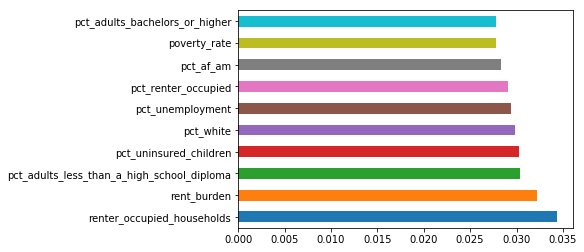

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [25]:
x=x[int_cols]
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(2546, 9)
(2546,)


In [26]:
# splt train test
nr.seed(9988)
x_train, x_test, y_train, y_test = train_test_split(x,y)

## Train models selected

In [27]:
lasso = make_pipeline(RobustScaler(), Lasso())
ENet = make_pipeline(RobustScaler(),ElasticNet())
KRR = KernelRidge(kernel='polynomial', degree=2)

In [28]:
lasso.fit(x_train,y_train)
ENet.fit(x_train,y_train)
KRR.fit(x_train,y_train)

C:\Users\esteban.londono\AppData\Local\Continuum\anaconda3\envs\AutoML\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


KernelRidge(alpha=1, coef0=1, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [29]:
# cross validation
Results_Lasso = cross_validate(lasso,x,y,scoring="r2",cv=5)
Results_Enet = cross_validate(ENet,x,y,scoring="r2",cv=5)
Results_KRR = cross_validate(KRR,x,y,scoring="r2",cv=5)



C:\Users\esteban.londono\AppData\Local\Continuum\anaconda3\envs\AutoML\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\esteban.londono\AppData\Local\Continuum\anaconda3\envs\AutoML\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\esteban.londono\AppData\Local\Continuum\anaconda3\envs\AutoML\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\esteban.londono\AppData\Local\Continuum\anaconda3\envs\AutoML\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix i

In [30]:
Lasso_test_scores = Results_Lasso['test_score']
Lasso_train_scores = Results_Lasso['train_score']
Enet_test_scores = Results_Enet['test_score']
Enet_train_scores = Results_Enet['train_score']
KRR_test_scores = Results_KRR['test_score']
KRR_train_scores = Results_KRR['train_score']

print(np.mean(Lasso_train_scores))
print(np.mean(Lasso_test_scores))
print(np.mean(Enet_train_scores))
print(np.mean(Enet_test_scores))
print(np.mean(KRR_train_scores))
print(np.mean(KRR_test_scores))

0.6905492309441522
0.6564961972349626
0.6728942549429419
0.6444883590517062
0.5650007436344777
0.30628926261353123


C:\Users\esteban.londono\AppData\Local\Continuum\anaconda3\envs\AutoML\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [33]:
estimator = make_pipeline(RobustScaler(), Lasso())
estimator.fit(x,y)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

### prediction

In [66]:
test_values=pd.read_csv('test_values.csv')
test_values= test_values.fillna(test_values.mean())



In [67]:
test_values=np.array(test_values[int_cols])

In [69]:
L_prediccion=pd.DataFrame(estimator.predict(test_values),columns=['evictions'])
L_prediccion.index.names=['row_id']
L_prediccion['evictions']= prediccion['evictions'].astype(np.int64)
L_prediccion.head()

,evictions
row_id,
0,702
1,536
2,-30
3,-38
4,317
5,348
6,-4
7,159
8,2157


In [70]:
prediccion.to_csv('prediccion.csv')